In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
main_app_data = pd.read_csv('application_data.csv')
prev_app_data = pd.read_csv('previous_application.csv')
#encoding not done properly therefore changed encoding type to cp1252 for column details file
columns_details = pd.read_csv('columns_description.csv',encoding='cp1252')

In [3]:
main_app_data.shape

(307511, 122)

In [4]:
main_app_data.info(-1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [5]:
main_app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


CHECKING MISSING VALUES AND DEALING WITH THE MISSING VALUES

In [6]:
main_app_data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [7]:
#Checking the percentage of null values in each column
null_percent= main_app_data.isnull().sum()/len(main_app_data)*100

In [8]:
#Creating data frame of above mentioned null percentage data and filter out the data having null values 
# greater than 40%
null_percent.sort_values(ascending=False)

COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
                              ...    
NAME_HOUSING_TYPE            0.000000
NAME_FAMILY_STATUS           0.000000
NAME_EDUCATION_TYPE          0.000000
NAME_INCOME_TYPE             0.000000
SK_ID_CURR                   0.000000
Length: 122, dtype: float64

In [9]:
#Creating  new data frame with null percentage
df_null = pd.DataFrame({'Attribute':main_app_data.columns,'Null_Percentage':null_percent})

In [10]:
#Filtering columns and converting to list where null percentage is more than 40 and removing the same from main data frame.
col_40= df_null[df_null['Null_Percentage']>40].Attribute.to_list()
col_40

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MOD

In [11]:
main_app_data.drop(col_40,axis=1,inplace=True)

In [12]:
main_app_data.shape

(307511, 73)

In [13]:
null_less_40 = df_null[df_null['Null_Percentage']<=40]

In [14]:
null_less_40.sort_values(by='Null_Percentage',ascending=False)

,Attribute,Null_Percentage
OCCUPATION_TYPE,OCCUPATION_TYPE,31.345545
EXT_SOURCE_3,EXT_SOURCE_3,19.825307
AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_YEAR,13.501631
AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_QRT,13.501631
AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_MON,13.501631
...,...,...
REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_LIVE_REGION,0.000000
REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.000000
LIVE_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,0.000000
TARGET,TARGET,0.000000


In [15]:
#Checking Occupation type Column

In [16]:
main_app_data.OCCUPATION_TYPE.value_counts(normalize=True)

Laborers                 0.261396
Sales staff              0.152056
Core staff               0.130589
Managers                 0.101227
Drivers                  0.088116
High skill tech staff    0.053903
Accountants              0.046481
Medicine staff           0.040437
Security staff           0.031835
Cooking staff            0.028164
Cleaning staff           0.022040
Private service staff    0.012562
Low-skill Laborers       0.009914
Waiters/barmen staff     0.006385
Secretaries              0.006181
Realty agents            0.003557
HR staff                 0.002667
IT staff                 0.002491
Name: OCCUPATION_TYPE, dtype: float64

In [17]:
#Here from the data we observe that most of the clients are classified under laborers.
# There is significant of missing value-around 31% in this column. Therefore, for the analysis we can 
# assume this , many clients may not informed the bank about thier occupation.
# In this case we will assume a new value "Not Known" and replace it wherever no value is present.

In [18]:
main_app_data.OCCUPATION_TYPE.fillna('Not Known',inplace=True)

In [19]:
## Next Column is EXT_SOURCE_3. As this is a numerical variable, and having very high NUll percentage,

In [20]:
main_app_data.EXT_SOURCE_3.describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

<Axes: >

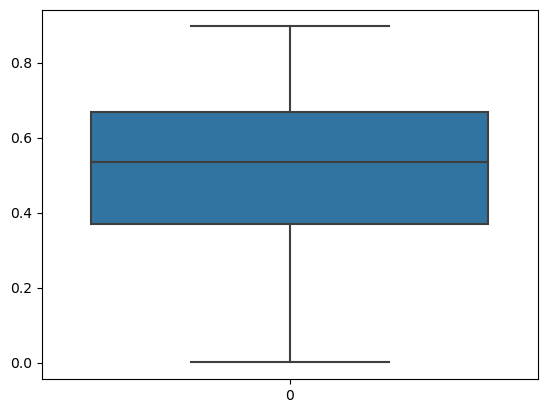

In [21]:
sns.boxplot(main_app_data.EXT_SOURCE_3)

In [22]:
# As it is clear from the box plot most of the values lies between 0.4 and 0.6 ,therfore imputing mean/median
# will not effect the analysis of our data.

In [23]:
main_app_data.EXT_SOURCE_3.mean()

0.5108529061799658

In [24]:
main_app_data.EXT_SOURCE_3.median()

0.5352762504724826

In [25]:
#Mean and median are very much same. Therefore, i will impute mean in place of missign data

In [26]:
main_app_data.EXT_SOURCE_3.fillna(main_app_data.EXT_SOURCE_3.mean(),inplace=True)

In [27]:
main_app_data.EXT_SOURCE_3.isnull().sum()

0

In [28]:
null_less_40.sort_values(by='Null_Percentage',ascending=False)

,Attribute,Null_Percentage
OCCUPATION_TYPE,OCCUPATION_TYPE,31.345545
EXT_SOURCE_3,EXT_SOURCE_3,19.825307
AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_YEAR,13.501631
AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_QRT,13.501631
AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_MON,13.501631
...,...,...
REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_LIVE_REGION,0.000000
REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.000000
LIVE_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,0.000000
TARGET,TARGET,0.000000


In [29]:
## Now Next 5 columns ie,AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT',
#'AMT_REQ_CREDIT_BUREAU_YEAR' have same number of missing values, which is equal.
## For this we can create a new column pertaining total credit enquiry
## in last 1 year and drop other 6 columns and then deal with missing values.

In [30]:
main_app_data['TOTAL_ENQ_YEAR']= main_app_data['AMT_REQ_CREDIT_BUREAU_HOUR']+main_app_data['AMT_REQ_CREDIT_BUREAU_DAY']+main_app_data['AMT_REQ_CREDIT_BUREAU_WEEK']+main_app_data['AMT_REQ_CREDIT_BUREAU_MON']+main_app_data['AMT_REQ_CREDIT_BUREAU_QRT']+main_app_data['AMT_REQ_CREDIT_BUREAU_YEAR']

In [31]:
main_app_data.drop(['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR'],axis=1,inplace=True)

In [32]:
main_app_data.TOTAL_ENQ_YEAR.isnull().sum()/len(main_app_data)

0.13501630835970097

In [33]:
## of Around 13% client, we do not have data of credit enquiries in last 1 year
## It could be an important factor, therefore I will not impute any data in this column.

In [34]:
### Now columns left with 0 to 1% of missing values

In [35]:
null_upto1= null_less_40[null_less_40['Null_Percentage']<=1]

In [36]:
null_upto1.sort_values(by='Null_Percentage',ascending=False).head(10)

,Attribute,Null_Percentage
NAME_TYPE_SUITE,NAME_TYPE_SUITE,0.420148
OBS_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.332021
DEF_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.332021
OBS_60_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,0.332021
DEF_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,0.332021
EXT_SOURCE_2,EXT_SOURCE_2,0.214626
AMT_GOODS_PRICE,AMT_GOODS_PRICE,0.090403
AMT_ANNUITY,AMT_ANNUITY,0.003902
CNT_FAM_MEMBERS,CNT_FAM_MEMBERS,0.000650
DAYS_LAST_PHONE_CHANGE,DAYS_LAST_PHONE_CHANGE,0.000325


In [37]:
## NAME_TYPE_SUITE column

In [38]:
main_app_data.NAME_TYPE_SUITE.value_counts(normalize=True)

Unaccompanied      0.811596
Family             0.131112
Spouse, partner    0.037130
Children           0.010669
Other_B            0.005780
Other_A            0.002828
Group of people    0.000885
Name: NAME_TYPE_SUITE, dtype: float64

In [39]:
### Via this result , we can say that many people has come alone for credit.
## As it is categorical variable, imputing mode in the data wherever missing value
## it will have no effect.

In [40]:
main_app_data.NAME_TYPE_SUITE.mode()

0    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object

In [41]:
main_app_data.NAME_TYPE_SUITE.fillna('Unaccompanied',inplace=True)

In [42]:
main_app_data.NAME_TYPE_SUITE.isnull().sum()

0

In [43]:
main_app_data.NAME_TYPE_SUITE.value_counts(normalize=True)
### No effect on normalized value of data

Unaccompanied      0.812387
Family             0.130561
Spouse, partner    0.036974
Children           0.010624
Other_B            0.005756
Other_A            0.002816
Group of people    0.000881
Name: NAME_TYPE_SUITE, dtype: float64

In [44]:
#### next 4 columns ie. OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
## has same number of missing values.

In [45]:
main_app_data.OBS_30_CNT_SOCIAL_CIRCLE.value_counts()

0.0      163910
1.0       48783
2.0       29808
3.0       20322
4.0       14143
5.0        9553
6.0        6453
7.0        4390
8.0        2967
9.0        2003
10.0       1376
11.0        852
12.0        652
13.0        411
14.0        258
15.0        166
16.0        133
17.0         88
18.0         46
19.0         44
20.0         30
21.0         29
22.0         22
23.0         15
25.0         11
24.0         11
27.0          5
26.0          3
30.0          2
28.0          1
29.0          1
47.0          1
348.0         1
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [46]:
main_app_data.OBS_30_CNT_SOCIAL_CIRCLE.describe()

count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [47]:
### Here we can see outlier is present, which is effecting the mean and median of the data.
### Therefore imputing mean will not be a good idea in this case. Here we can try imputing median in the data.

In [48]:
main_app_data.OBS_30_CNT_SOCIAL_CIRCLE.fillna(main_app_data.OBS_30_CNT_SOCIAL_CIRCLE.median(),inplace=True)

In [49]:
main_app_data.OBS_30_CNT_SOCIAL_CIRCLE.isnull().sum()

0

In [50]:
main_app_data.DEF_30_CNT_SOCIAL_CIRCLE.describe()

count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [51]:
main_app_data.DEF_30_CNT_SOCIAL_CIRCLE.fillna(main_app_data.DEF_30_CNT_SOCIAL_CIRCLE.median(),inplace=True)

In [52]:
main_app_data.DEF_30_CNT_SOCIAL_CIRCLE.isnull().sum()

0

In [53]:
main_app_data.OBS_60_CNT_SOCIAL_CIRCLE.fillna(main_app_data.OBS_60_CNT_SOCIAL_CIRCLE.median(),inplace=True)

In [54]:
main_app_data.OBS_60_CNT_SOCIAL_CIRCLE.isnull().sum()

0

In [55]:
main_app_data.DEF_60_CNT_SOCIAL_CIRCLE.fillna(main_app_data.DEF_60_CNT_SOCIAL_CIRCLE.median(),inplace=True)

In [56]:
main_app_data.DEF_60_CNT_SOCIAL_CIRCLE.isnull().sum()

0

In [57]:
### EXT_SOURCE_2 

In [58]:
main_app_data.EXT_SOURCE_2.isnull().sum()

660

In [59]:
main_app_data.EXT_SOURCE_2.describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

In [60]:
## Mean and median are approximately equal. We can impute anything in place of missing values

In [61]:
main_app_data.EXT_SOURCE_2.fillna(main_app_data.EXT_SOURCE_2.mean(),inplace=True)

In [62]:
#### AMT_GOODS_PRICE

In [63]:
main_app_data.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [64]:
### Mean and median values can be used for imputation.

In [65]:
main_app_data.AMT_GOODS_PRICE.fillna(main_app_data.AMT_GOODS_PRICE.mean(),inplace=True)

In [66]:
### AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE
### These 3 variables having very less number of missing values as compared to all data.
## Therefore we can drop the rows wherever null values are there pertaining to these columns

In [67]:
main_app_data = main_app_data[~main_app_data.AMT_ANNUITY.isnull()==True]

In [68]:
main_app_data.AMT_ANNUITY.isnull().sum()

0

In [69]:
main_app_data = main_app_data[~main_app_data.CNT_FAM_MEMBERS.isnull()==True]

In [70]:
main_app_data.CNT_FAM_MEMBERS.isnull().sum()

0

In [71]:
main_app_data = main_app_data[~main_app_data.DAYS_LAST_PHONE_CHANGE.isnull()==True]

In [72]:
main_app_data.DAYS_LAST_PHONE_CHANGE.isnull().sum()

0

In [73]:
main_app_data.shape

(307496, 68)

In [74]:
main_app_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307496 entries, 0 to 307510
Data columns (total 68 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307496 non-null  int64  
 1   TARGET                       307496 non-null  int64  
 2   NAME_CONTRACT_TYPE           307496 non-null  object 
 3   CODE_GENDER                  307496 non-null  object 
 4   FLAG_OWN_CAR                 307496 non-null  object 
 5   FLAG_OWN_REALTY              307496 non-null  object 
 6   CNT_CHILDREN                 307496 non-null  int64  
 7   AMT_INCOME_TOTAL             307496 non-null  float64
 8   AMT_CREDIT                   307496 non-null  float64
 9   AMT_ANNUITY                  307496 non-null  float64
 10  AMT_GOODS_PRICE              307496 non-null  float64
 11  NAME_TYPE_SUITE              307496 non-null  object 
 12  NAME_INCOME_TYPE             307496 non-null  object 
 13 

CHECKING CATEGORICAL COLUMNS AND DATA PRESENT IN THE COLUMNS 

In [75]:
main_app_data.NAME_CONTRACT_TYPE.value_counts()

Cash loans         278219
Revolving loans     29277
Name: NAME_CONTRACT_TYPE, dtype: int64

In [76]:
main_app_data.CODE_GENDER.value_counts()

F      202439
M      105053
XNA         4
Name: CODE_GENDER, dtype: int64

In [77]:
### Here we have observed that one XNA value is written in 4 columns, this could be changed to M/F for better analysis
### We will change it to F.

In [78]:
main_app_data.CODE_GENDER = main_app_data.CODE_GENDER.apply(lambda x: 'F' if x=='XNA' else x) 

In [79]:
main_app_data.CODE_GENDER.value_counts()

F    202443
M    105053
Name: CODE_GENDER, dtype: int64

In [80]:
main_app_data.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67989
XNA                       55374
Self-employed             38409
Other                     16681
Medicine                  11192
Business Entity Type 2    10552
Government                10403
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5983
Transport: type 4          5398
Trade: type 3              3491
Industry: type 9           3368
Industry: type 3           3278
Security                   3246
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [81]:
### Here XNA is mentioned as organization which is the 2nd highest values in the column.
### We will replace XNA with 'Unknown' variable in this column

In [82]:
main_app_data.ORGANIZATION_TYPE = main_app_data.ORGANIZATION_TYPE.apply(lambda x: 'Unknown' if x=='XNA' else x)

In [83]:
main_app_data.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67989
Unknown                   55374
Self-employed             38409
Other                     16681
Medicine                  11192
Business Entity Type 2    10552
Government                10403
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5983
Transport: type 4          5398
Trade: type 3              3491
Industry: type 9           3368
Industry: type 3           3278
Security                   3246
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [84]:
####  DAYS_BIRTH COLUMN

In [85]:
main_app_data.DAYS_BIRTH 
#### WE OBSERVE THAT THERE ARE NEGATIVE VALUES IN DAYS_BIRTH COLUMN, WE HAVE TO CHANGE IT TO 
#### NON NEGATIVE VALUES AND REDUCE IT AGE IN YEARS RATHER THAN KEEP IT IN NUMBER OF DAYS

0         -9461
1        -16765
2        -19046
3        -19005
4        -19932
          ...  
307506    -9327
307507   -20775
307508   -14966
307509   -11961
307510   -16856
Name: DAYS_BIRTH, Length: 307496, dtype: int64

In [86]:
main_app_data['AGE_IN_YEARS'] = main_app_data.DAYS_BIRTH.apply(lambda x: round(-(x/365)) if x<0 else round(x/365))

In [87]:
main_app_data.AGE_IN_YEARS.describe()

count    307496.000000
mean         43.938939
std          11.964055
min          21.000000
25%          34.000000
50%          43.000000
75%          54.000000
max          69.000000
Name: AGE_IN_YEARS, dtype: float64

In [88]:
### AGE OF CLIENTS CAN BE GROUPED INTO AGE BRACKETS/BINS FOR BETTER ANALYSIS.
### FOR THAT WE CAN ASSIGN A AGE GROUP TO EVERY AGE

In [89]:
def age_group(age):
    if age <= 20:
        return '0-20'
    elif age > 20 and age <= 30:
        return '20-30'
    elif age > 30 and age <= 40:
        return '30-40'  
    elif age > 40 and age <= 50:
        return '40-50'
    elif age > 50 and age <= 60:
        return '50-60'
    elif age > 60 and age <= 70:
        return '60-70'
    elif age > 70:
        return '70+'

In [90]:
main_app_data['AGE_GROUP']= main_app_data['AGE_IN_YEARS'].apply(age_group)

In [91]:
main_app_data.AGE_GROUP.value_counts()

30-40    82765
40-50    75505
50-60    67953
20-30    48865
60-70    32408
Name: AGE_GROUP, dtype: int64

In [92]:
### Now we will drop the column DAYS_BIRTH from our data

In [93]:
main_app_data.drop(['DAYS_BIRTH'],axis=1,inplace=True)

In [94]:
main_app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TOTAL_ENQ_YEAR,AGE_IN_YEARS,AGE_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,0,1.0,26,20-30
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,0,0,0.0,46,40-50
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0,0,0,0.0,52,50-60
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0,0,NaN,52,50-60
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0,0,0,0.0,55,50-60


In [95]:
### From the table we also observe that few more columns related to Days like DAYS_REGISTRATION,DAYS_ID_PUBLISH,
### DAYS_EMPLOYED,DAYS_LAST_PHONE_CHANGE where there are negative values present.
### We will convert these to positive values. 

In [96]:
main_app_data.DAYS_REGISTRATION.describe()

count    307496.000000
mean      -4986.126746
std        3522.867752
min      -24672.000000
25%       -7479.000000
50%       -4504.000000
75%       -2010.000000
max           0.000000
Name: DAYS_REGISTRATION, dtype: float64

In [97]:
main_app_data.DAYS_REGISTRATION = main_app_data.DAYS_REGISTRATION.apply(lambda x: -x if x<0 else x)

In [98]:
main_app_data.DAYS_REGISTRATION.describe()

count    307496.000000
mean       4986.126746
std        3522.867752
min           0.000000
25%        2010.000000
50%        4504.000000
75%        7479.000000
max       24672.000000
Name: DAYS_REGISTRATION, dtype: float64

In [99]:
main_app_data.DAYS_ID_PUBLISH.describe()

count    307496.000000
mean      -2994.218507
std        1509.451425
min       -7197.000000
25%       -4299.000000
50%       -3254.000000
75%       -1720.000000
max           0.000000
Name: DAYS_ID_PUBLISH, dtype: float64

In [100]:
main_app_data.DAYS_ID_PUBLISH= main_app_data.DAYS_ID_PUBLISH.apply(lambda x: -x if x<0 else x)

In [101]:
main_app_data.DAYS_ID_PUBLISH.describe()

count    307496.000000
mean       2994.218507
std        1509.451425
min           0.000000
25%        1720.000000
50%        3254.000000
75%        4299.000000
max        7197.000000
Name: DAYS_ID_PUBLISH, dtype: float64

In [102]:
main_app_data.DAYS_EMPLOYED.describe()

count    307496.000000
mean      63818.252094
std      141278.466175
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [103]:
main_app_data.DAYS_EMPLOYED = main_app_data.DAYS_EMPLOYED.apply(lambda x: -x if x<0 else x)

In [104]:
main_app_data.DAYS_EMPLOYED.describe()

count    307496.000000
mean      67727.952617
std      139446.394958
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [105]:
main_app_data.DAYS_LAST_PHONE_CHANGE.describe()

count    307496.000000
mean       -962.863400
std         826.811646
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [106]:
main_app_data.DAYS_LAST_PHONE_CHANGE= main_app_data.DAYS_LAST_PHONE_CHANGE.apply(lambda x: -x if x<0 else x)

CHECKING FOR OUTLIERS AND DEALING WITH THEM

In [107]:
main_app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TOTAL_ENQ_YEAR,AGE_IN_YEARS,AGE_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,0,1.0,26,20-30
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,0,0,0.0,46,40-50
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0,0,0,0.0,52,50-60
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0,0,NaN,52,50-60
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0,0,0,0.0,55,50-60


In [108]:
##CNT_CHILDREN
main_app_data.CNT_CHILDREN.describe()

count    307496.000000
mean          0.417072
std           0.722133
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

<Axes: >

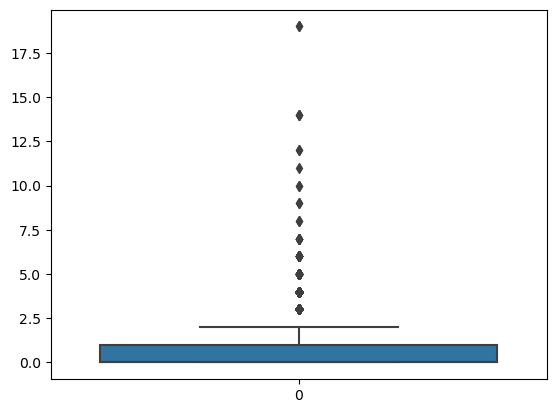

In [109]:
sns.boxplot(main_app_data.CNT_CHILDREN)

In [110]:
### From the box plot we can see that CNT_CHILDREN>3 is a outlier. Which is also apparent from the describ
### function which is showing max value as 19.
### Therefore , we will drop all the rows where CNT_CHILDREN is more than 3 

In [111]:
main_app_data= main_app_data[main_app_data['CNT_CHILDREN']<3]

<Axes: >

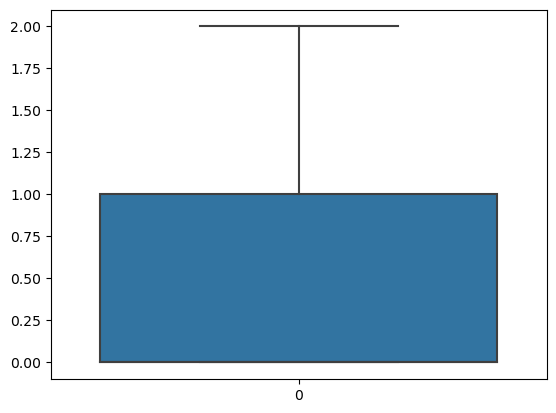

In [112]:
sns.boxplot(main_app_data['CNT_CHILDREN'])

In [113]:
### AMT_INCOME_TOTAL column


<Axes: >

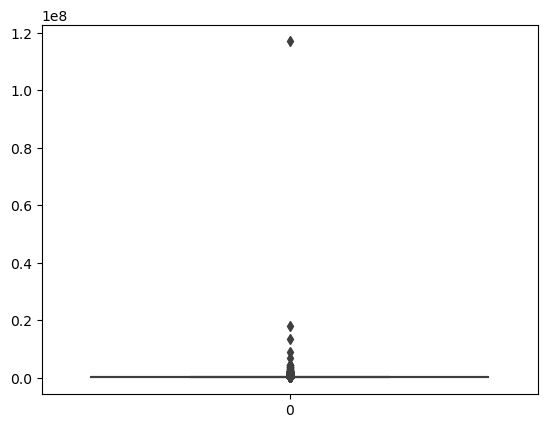

In [114]:
sns.boxplot(main_app_data.AMT_INCOME_TOTAL)

In [115]:
main_app_data.AMT_INCOME_TOTAL.describe()

count    3.032240e+05
mean     1.687319e+05
std      2.384175e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.468125e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [116]:
np.quantile(main_app_data.AMT_INCOME_TOTAL,q=0.991)

495000.0

In [117]:
### We can say that income above 500000 can be treated as outliers from the above calculation.Therefore we will
### drop these values from our analysis

In [118]:
len(main_app_data[main_app_data.AMT_INCOME_TOTAL>495000])

2642

In [119]:
### only 2642 columns are there, we can drop these columns

In [120]:
main_app_data= main_app_data[main_app_data.AMT_INCOME_TOTAL<500000]

In [121]:
main_app_data.AMT_INCOME_TOTAL.describe()

count    300587.000000
mean     163306.386968
std       78248.992827
min       25650.000000
25%      112500.000000
50%      144000.000000
75%      202500.000000
max      499500.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [122]:
###AMT_CREDIT

In [123]:
main_app_data.AMT_CREDIT.describe()

count    3.005870e+05
mean     5.943135e+05
std      3.974121e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.094000e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

<Axes: >

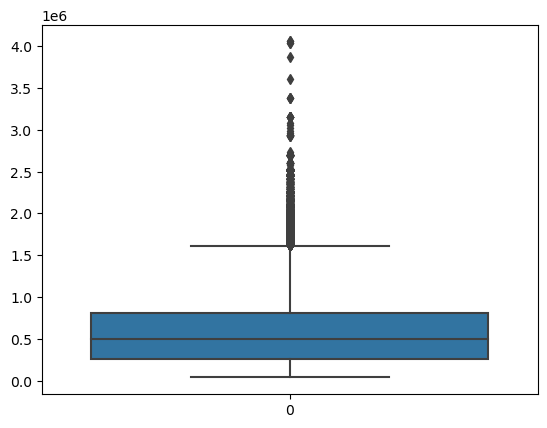

In [124]:
sns.boxplot(main_app_data.AMT_CREDIT)

In [125]:
np.quantile(main_app_data.AMT_CREDIT,q=0.90)

1125000.0

In [126]:
np.quantile(main_app_data.AMT_CREDIT,q=0.99)

1800000.0

In [127]:
len(main_app_data[main_app_data.AMT_CREDIT>1800000])/len(main_app_data)*100

0.9587906329947736

In [128]:
### We can say that AMT_CREDIT above 1800000 as an outlier. Outliers are less than 1% of the data.
### Dropping them will not effect our analysis that much

In [129]:
main_app_data=  main_app_data[main_app_data.AMT_CREDIT<1800000]

In [130]:
### AMT ANNUNITY COLUMN

In [131]:
main_app_data.AMT_ANNUITY.describe()

count    296877.000000
mean      26422.157313
std       13456.915737
min        1615.500000
25%       16375.500000
50%       24579.000000
75%       33750.000000
max      160686.000000
Name: AMT_ANNUITY, dtype: float64

<Axes: >

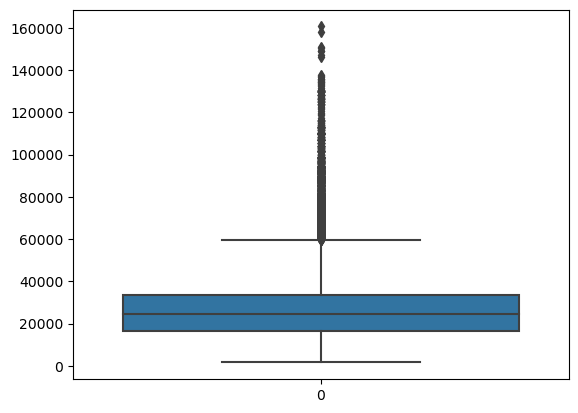

In [132]:
sns.boxplot(main_app_data.AMT_ANNUITY)

In [133]:
### From the plot we can say , ANNuity above 60000 are outliers

In [134]:
### AMT_GOODS_PRICE- price for which loan amount has been sanctioned by bank

In [135]:
main_app_data.AMT_GOODS_PRICE.describe()

count    2.968770e+05
mean     5.168743e+05
std      3.317122e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.750000e+05
max      1.795500e+06
Name: AMT_GOODS_PRICE, dtype: float64

<Axes: >

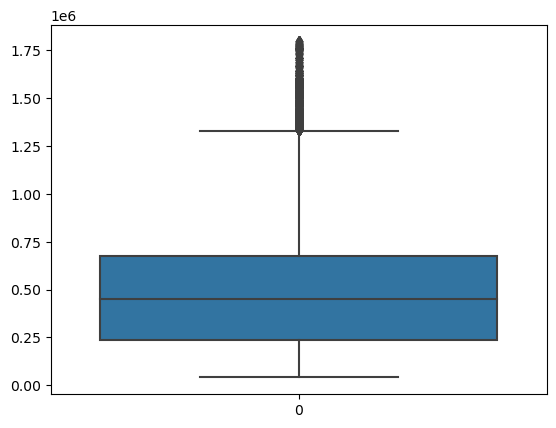

In [136]:
sns.boxplot(main_app_data.AMT_GOODS_PRICE)

ANALYSIS

In [137]:
main_app_data.TARGET.value_counts(normalize=True)*100

0    91.878792
1     8.121208
Name: TARGET, dtype: float64

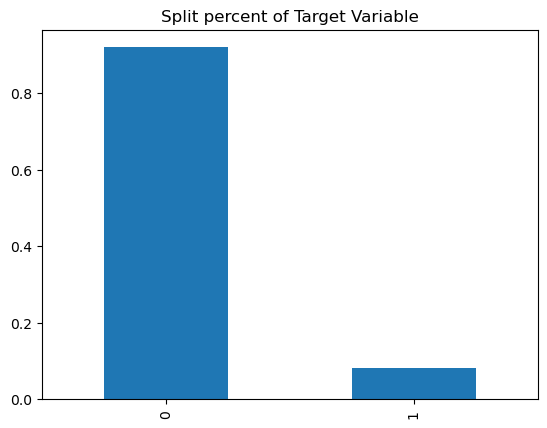

In [138]:
main_app_data.TARGET.value_counts(normalize=True).plot.bar()
plt.title('Split percent of Target Variable')
plt.show()

In [139]:
main_app_data.CODE_GENDER.value_counts(normalize=True)

F    0.66124
M    0.33876
Name: CODE_GENDER, dtype: float64

In [140]:
### By analysing target Variable, only 9% approx bank has lend to person with 
### payment difficulties. Only this data we have to analyse for our study.

In [141]:
main_app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TOTAL_ENQ_YEAR,AGE_IN_YEARS,AGE_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,0,1.0,26,20-30
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,0,0,0.0,46,40-50
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0,0,0,0.0,52,50-60
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0,0,NaN,52,50-60
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0,0,0,0.0,55,50-60


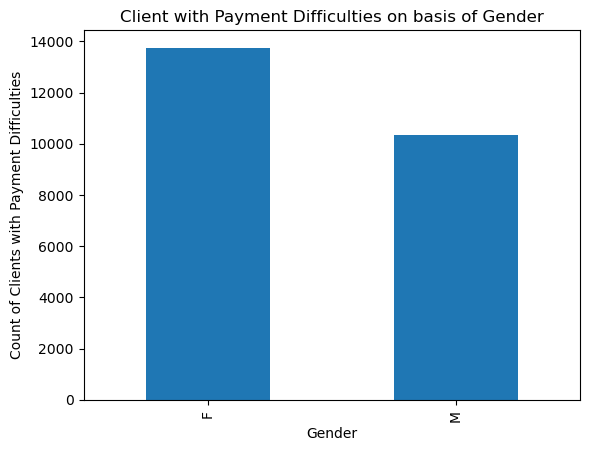

In [142]:
main_app_data.groupby(['CODE_GENDER'])['TARGET'].sum().plot.bar()
plt.title('Client with Payment Difficulties on basis of Gender')
plt.xlabel('Gender')
plt.ylabel('Count of Clients with Payment Difficulties')
plt.show()

With respect to above plot we have observed that most of the clients which are having payment difficulty is Female.
But this does not have good conclusion as our Data contains infomation in the ratio Female(2):Male(1)

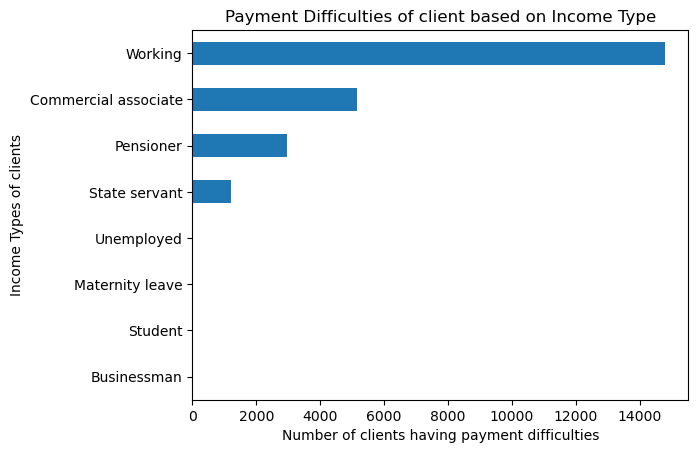

In [143]:
main_app_data.groupby(['NAME_INCOME_TYPE'])['TARGET'].sum().sort_values().plot.barh()
plt.title('Payment Difficulties of client based on Income Type')
plt.xlabel('Number of clients having payment difficulties')
plt.ylabel('Income Types of clients')
plt.show()

On the basis of Income type we can conclude that payment difficulties are generally found in clients who are working class.
As working class only approach for any type of credit to the bank.

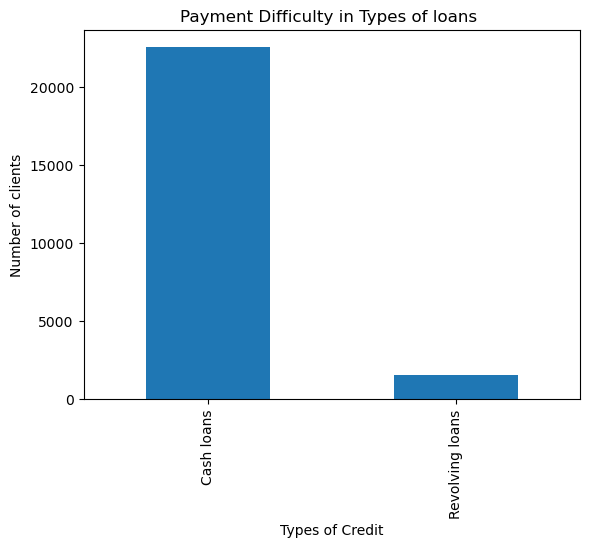

In [144]:
main_app_data.groupby(['NAME_CONTRACT_TYPE'])['TARGET'].sum().plot.bar()
plt.title('Payment Difficulty in Types of loans ')
plt.xlabel('Types of Credit')
plt.ylabel('Number of clients')
plt.show()

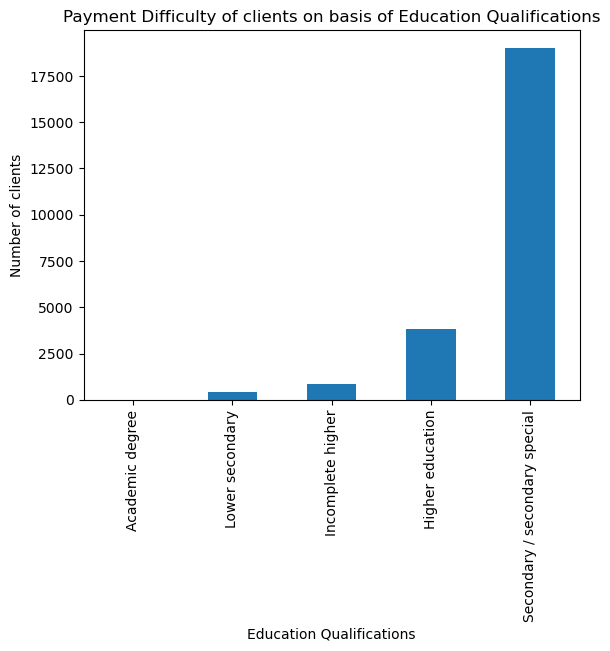

In [145]:
main_app_data.groupby(['NAME_EDUCATION_TYPE'])['TARGET'].sum().sort_values().plot.bar()
plt.title('Payment Difficulty of clients on basis of Education Qualifications')
plt.xlabel('Education Qualifications')
plt.ylabel('Number of clients')
plt.show()

Payment Difficulites are more in those cases where client has not done secondary education.
This could be important factor which can be taken into consideration while giving credit

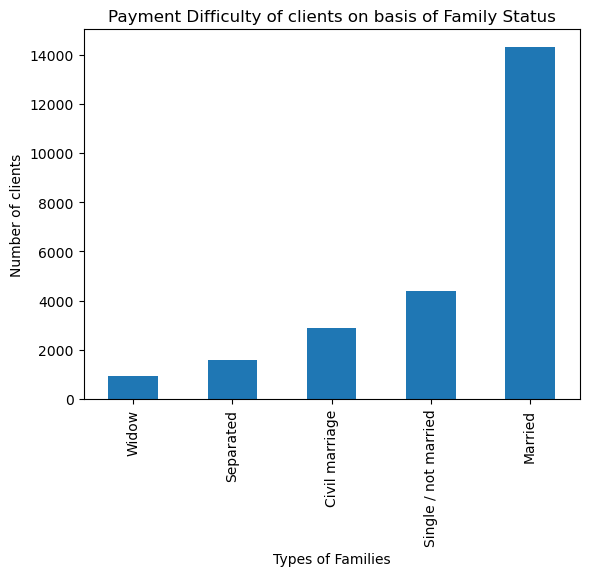

In [146]:
main_app_data.groupby(['NAME_FAMILY_STATUS'])['TARGET'].sum().sort_values().plot.bar()
plt.title('Payment Difficulty of clients on basis of Family Status')
plt.xlabel('Types of Families')
plt.ylabel('Number of clients')
plt.show()

Payment Difficulty could be find more in persons who are married which might be due to family commitments,
Whereas widows or seperated persons are having very less payment difficulties

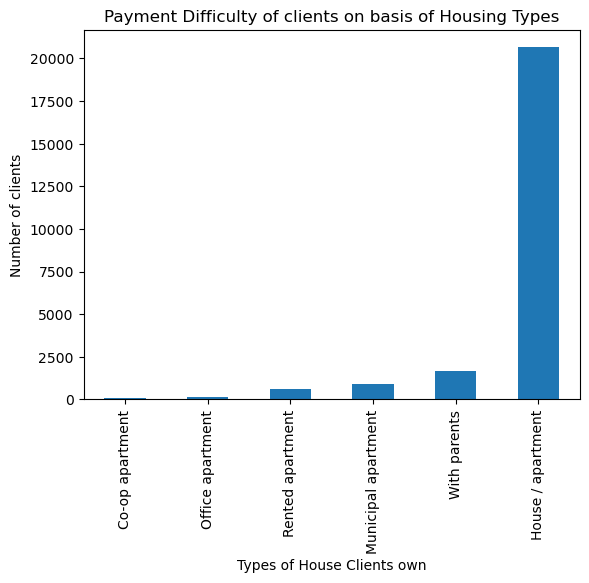

In [147]:
main_app_data.groupby(['NAME_HOUSING_TYPE'])['TARGET'].sum().sort_values().plot.bar()
plt.title('Payment Difficulty of clients on basis of Housing Types')
plt.xlabel('Types of House Clients own')
plt.ylabel('Number of clients')
plt.show()

Payment Difficulties are seen in persons who are having House/Appartment for there use

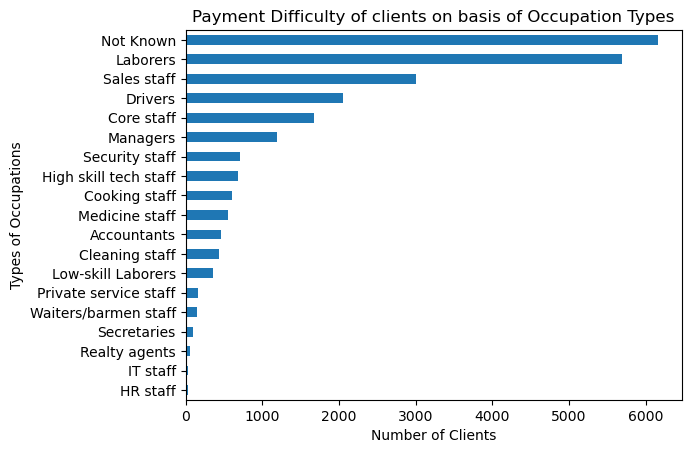

In [148]:
main_app_data.groupby(['OCCUPATION_TYPE'])['TARGET'].sum().sort_values().plot.barh()
plt.title('Payment Difficulty of clients on basis of Occupation Types')
plt.xlabel('Number of Clients')
plt.ylabel('Types of Occupations')
plt.show()

Here, we have highest value where Occupation is not known of a person. But going by the value , we can see
that clients workign as laborers, sales staff, Drivers (generally low income group) are facing difficulty 
in payment of the loans.

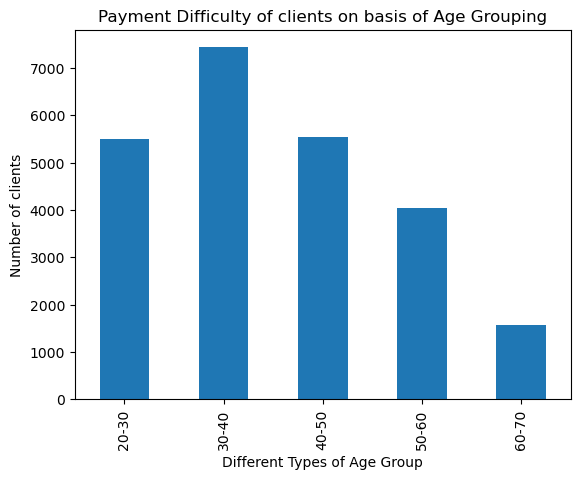

In [149]:
main_app_data.groupby(['AGE_GROUP'])['TARGET'].sum().plot.bar()
plt.title('Payment Difficulty of clients on basis of Age Grouping')
plt.xlabel('Different Types of Age Group')
plt.ylabel('Number of clients')
plt.show()

Clients facing payment difficulty is more during the agr group of 30-40 as this is time where generally people
expand their family, more committments get added in their life. Expenditure increases which can lead to on-time
payment difficulties

In [150]:
### For Income also we can create a Range

In [151]:
bins = [0,100000,200000,300000,400000,500000]
categ= ['<100000','100000-200000','200000-300000','300000-400000','400000-500000']

main_app_data['INCOME_GROUP']= pd.cut(main_app_data.AMT_INCOME_TOTAL,bins=bins,labels=categ)

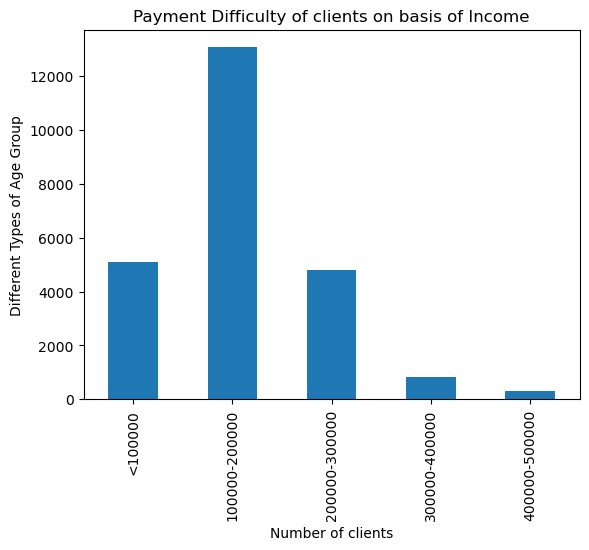

In [291]:
main_app_data.groupby(['INCOME_GROUP'])['TARGET'].sum().plot.bar()
plt.title('Payment Difficulty of clients on basis of Income')
plt.xlabel('Number of clients')
plt.ylabel('Different Types of Age Group')
plt.show()

Clients having income range between 1 lakh to 2 lakh generally facing more difficulty in making the on-time payments.

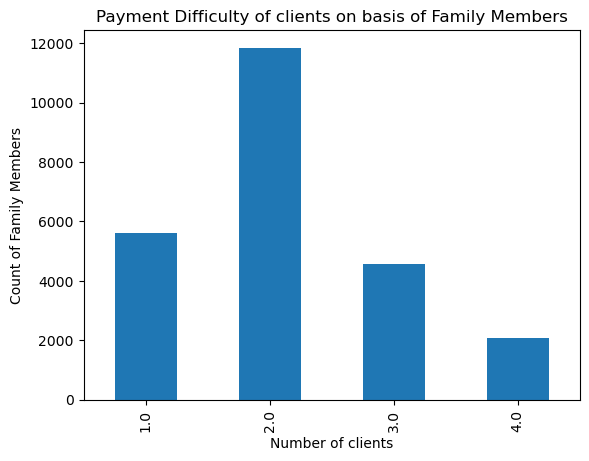

In [153]:
main_app_data.groupby(['CNT_FAM_MEMBERS'])['TARGET'].sum().plot.bar()
plt.title('Payment Difficulty of clients on basis of Family Members')
plt.xlabel('Number of clients')
plt.ylabel('Count of Family Members')
plt.show()

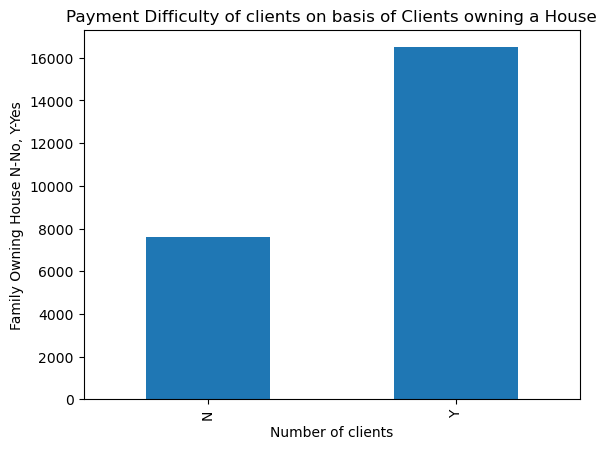

In [154]:
main_app_data.groupby(['FLAG_OWN_REALTY'])['TARGET'].sum().plot.bar()
plt.title('Payment Difficulty of clients on basis of Clients owning a House')
plt.xlabel('Number of clients')
plt.ylabel('Family Owning House N-No, Y-Yes')
plt.show()

PREVIOUS APPLICATION DATA

In [155]:
prev_app_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [156]:
prev_app_data.shape

(1670214, 37)

In [157]:
prev_app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [158]:
prev_app_data.isnull().sum()/len(prev_app_data)*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [159]:
prev_null= pd.DataFrame({'Col_name':prev_app_data.columns,'Null_per':prev_app_data.isnull().sum()/len(prev_app_data)*100})

In [160]:
prev_null

,Col_name,Null_per
SK_ID_PREV,SK_ID_PREV,0.000000
SK_ID_CURR,SK_ID_CURR,0.000000
NAME_CONTRACT_TYPE,NAME_CONTRACT_TYPE,0.000000
AMT_ANNUITY,AMT_ANNUITY,22.286665
AMT_APPLICATION,AMT_APPLICATION,0.000000
AMT_CREDIT,AMT_CREDIT,0.000060
AMT_DOWN_PAYMENT,AMT_DOWN_PAYMENT,53.636480
AMT_GOODS_PRICE,AMT_GOODS_PRICE,23.081773
WEEKDAY_APPR_PROCESS_START,WEEKDAY_APPR_PROCESS_START,0.000000
HOUR_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,0.000000


In [161]:
prev_null_40 = prev_null[prev_null['Null_per']>=40].Col_name.to_list()

In [162]:
prev_null_40

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [163]:
prev_app_data.drop(prev_null_40,axis=1,inplace=True)

In [164]:
prev_app_data.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    372235
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_GOODS_PRICE                385515
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                    372230
NAME_YIELD_GROUP                    0
PRODUCT_COMBINATION               346
dtype: int64

In [165]:
prev_app_data.AMT_ANNUITY.describe(percentiles=[0.90,0.99])

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
50%      1.125000e+04
90%      3.470382e+04
99%      6.968579e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

<Axes: >

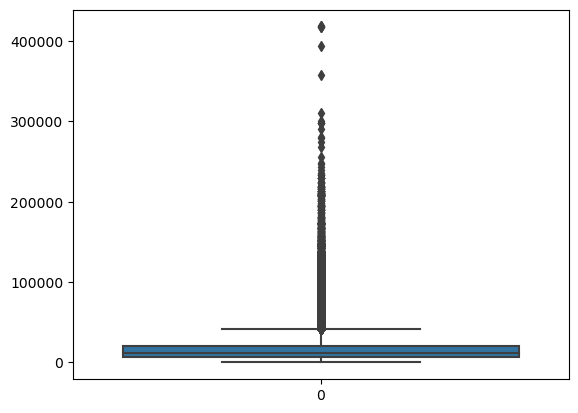

In [166]:
sns.boxplot(prev_app_data.AMT_ANNUITY)

In [167]:
#From above that we can conclude that AMT_ANNUITY above 70000 can be considered as outliers.
## First we will find the number of data points above 70000

In [168]:
len(prev_app_data[prev_app_data.AMT_ANNUITY>70000])

12692

In [169]:
len(prev_app_data[prev_app_data.AMT_ANNUITY>70000])/len(prev_app_data)*100

0.7599026232566605

In [170]:
## hardly 1% of the data, therefore we can drop the outliers

In [171]:
prev_app_data = prev_app_data[prev_app_data.AMT_ANNUITY<=70000]

In [172]:
prev_app_data.AMT_ANNUITY.describe()

count    1.285287e+06
mean     1.521965e+04
std      1.262165e+04
min      0.000000e+00
25%      6.281775e+03
50%      1.122052e+04
75%      2.025000e+04
max      6.999313e+04
Name: AMT_ANNUITY, dtype: float64

In [173]:
prev_app_data.isnull().sum()

SK_ID_PREV                         0
SK_ID_CURR                         0
NAME_CONTRACT_TYPE                 0
AMT_ANNUITY                        0
AMT_APPLICATION                    0
AMT_CREDIT                         1
AMT_GOODS_PRICE                51659
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
FLAG_LAST_APPL_PER_CONTRACT        0
NFLAG_LAST_APPL_IN_DAY             0
NAME_CASH_LOAN_PURPOSE             0
NAME_CONTRACT_STATUS               0
DAYS_DECISION                      0
NAME_PAYMENT_TYPE                  0
CODE_REJECT_REASON                 0
NAME_CLIENT_TYPE                   0
NAME_GOODS_CATEGORY                0
NAME_PORTFOLIO                     0
NAME_PRODUCT_TYPE                  0
CHANNEL_TYPE                       0
SELLERPLACE_AREA                   0
NAME_SELLER_INDUSTRY               0
CNT_PAYMENT                        0
NAME_YIELD_GROUP                   0
PRODUCT_COMBINATION                0
dtype: int64

In [174]:
#### From above step , we came to know that just by removing outliers from AMT_ANNUITY ,
### most of the missing values rows also got removed. Now we have left with only 2 columns where 
### missing dats is present

In [175]:
prev_app_data.AMT_GOODS_PRICE.describe(percentiles=[0.90,0.999])

count    1.233628e+06
mean     2.216257e+05
std      2.932739e+05
min      0.000000e+00
50%      1.125000e+05
90%      5.625000e+05
99.9%    2.250000e+06
max      3.982500e+06
Name: AMT_GOODS_PRICE, dtype: float64

<Axes: >

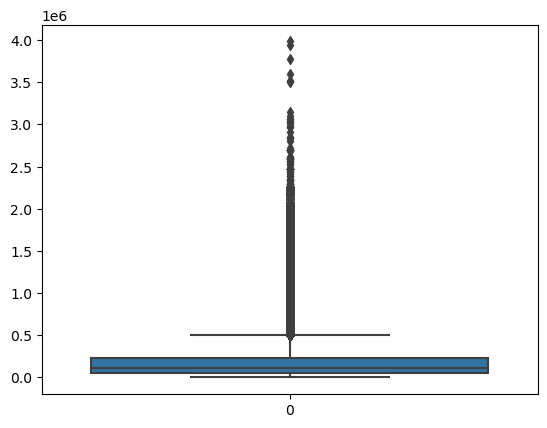

In [176]:
sns.boxplot(prev_app_data.AMT_GOODS_PRICE)

In [177]:
### as this column has very less percentage of missing that , therefore i will impute the mean inplace of missing data

In [178]:
prev_app_data.AMT_GOODS_PRICE.fillna(prev_app_data.AMT_GOODS_PRICE.mean(),inplace=True)

In [179]:
prev_app_data.AMT_GOODS_PRICE.isnull().sum()

0

In [180]:
prev_app_data =prev_app_data[~prev_app_data['AMT_CREDIT'].isnull()==True]

In [181]:
prev_app_data['AMT_CREDIT'].isnull().sum()

0

In [182]:
prev_app_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [183]:
### Checking each columns for Wrong data or outliers

In [184]:
prev_app_data.NAME_CONTRACT_TYPE.value_counts()

Consumer loans     690313
Cash loans         449995
Revolving loans    144978
Name: NAME_CONTRACT_TYPE, dtype: int64

In [185]:
prev_app_data.NAME_CASH_LOAN_PURPOSE.value_counts()

XAP                                 835291
XNA                                 382423
Repairs                              23143
Other                                15150
Urgent needs                          8290
Buying a used car                     2769
Building a house or an annex          2486
Everyday expenses                     2372
Medicine                              2152
Payments on other loans               1867
Education                             1563
Journey                               1218
Purchase of electronic equipment      1045
Wedding / gift / holiday               950
Buying a new car                       893
Car repairs                            791
Buying a home                          772
Furniture                              735
Buying a holiday home / land           480
Business development                   376
Gasification / water supply            296
Buying a garage                        130
Hobby                                   54
Money for a

In [186]:
prev_app_data.NAME_CONTRACT_STATUS.value_counts()

Approved        1028336
Refused          245854
Canceled          10184
Unused offer        912
Name: NAME_CONTRACT_STATUS, dtype: int64

In [187]:
prev_app_data.NAME_PAYMENT_TYPE.value_counts()

Cash through the bank                        985596
XNA                                          290540
Non-cash from your account                     8090
Cashless from the account of the employer      1060
Name: NAME_PAYMENT_TYPE, dtype: int64

In [188]:
## Treating XNA variable
prev_app_data.NAME_PAYMENT_TYPE = prev_app_data.NAME_PAYMENT_TYPE.apply(lambda x: "Method Not Known" if x=='XNA' else x)

In [189]:
prev_app_data.NAME_PAYMENT_TYPE.value_counts()

Cash through the bank                        985596
Method Not Known                             290540
Non-cash from your account                     8090
Cashless from the account of the employer      1060
Name: NAME_PAYMENT_TYPE, dtype: int64

In [190]:
prev_app_data.CODE_REJECT_REASON.value_counts()

XAP       1038513
HC         144376
LIMIT       50237
SCO         35561
SCOFR        8641
XNA          3347
VERIF        3046
CLIENT        912
SYSTEM        653
Name: CODE_REJECT_REASON, dtype: int64

In [191]:
prev_app_data.NAME_CLIENT_TYPE.value_counts()

Repeater     880529
New          293746
Refreshed    110116
XNA             895
Name: NAME_CLIENT_TYPE, dtype: int64

In [192]:
### Here XNA could be replaced with Repeater

In [193]:
prev_app_data.NAME_CLIENT_TYPE = prev_app_data.NAME_CLIENT_TYPE.apply(lambda x: 'Repeater' if x=='XNA' else x)

In [194]:
prev_app_data.NAME_CLIENT_TYPE.value_counts()

Repeater     881424
New          293746
Refreshed    110116
Name: NAME_CLIENT_TYPE, dtype: int64

In [195]:
prev_app_data.NAME_PRODUCT_TYPE.value_counts()

XNA        690313
x-sell     447477
walk-in    147496
Name: NAME_PRODUCT_TYPE, dtype: int64

In [196]:
prev_app_data.NAME_PORTFOLIO.value_counts()

POS      689926
Cash     449995
Cards    144978
Cars        387
Name: NAME_PORTFOLIO, dtype: int64

In [197]:
prev_app_data.NAME_YIELD_GROUP.value_counts()

middle        381946
high          352307
low_normal    316296
XNA           144978
low_action     89759
Name: NAME_YIELD_GROUP, dtype: int64

MERGING BOTH TABLES TO GET NEW TABLE ON COLUMN SK_ID_CURR

In [198]:
new_combined= main_app_data.merge(prev_app_data,how='left',on='SK_ID_CURR')

In [199]:
new_combined.shape

(1078771, 95)

In [200]:
new_combined.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Refreshed,Furniture,POS,XNA,Stone,1400.0,Furniture,6.0,middle,POS industry with interest
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200.0,Consumer electronics,12.0,middle,POS household with interest
3,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,New,Mobile,POS,XNA,Regional / Local,30.0,Connectivity,4.0,middle,POS mobile without interest
4,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,48.0,low_normal,Cash X-Sell: low


In [215]:
### FOR STUDYING ONLY THAT DATA WHERE CLIENT HAS HAVING PAYMENT DIFFICULTIES,
### WE CAN DISTRIBUTE THE DATA INTO TWO SETS, WHERE TARGET VALUE IS 1 AND TARGET VALUE IS 0

In [221]:
new_combined_diff = new_combined[new_combined['TARGET']==1]
new_combined_ontime = new_combined[new_combined['TARGET']==0]

In [222]:
new_combined_diff.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest
82,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,Repeater,XNA,Cards,x-sell,Credit and cash offices,-1.0,XNA,0.0,XNA,Card X-Sell
132,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,Refreshed,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,24.0,high,Cash X-Sell: high
133,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1.0,XNA,36.0,low_normal,Cash Street: low


In [223]:
new_combined_diff.shape

(90253, 95)

In [224]:
new_combined_ontime.shape

(988518, 95)

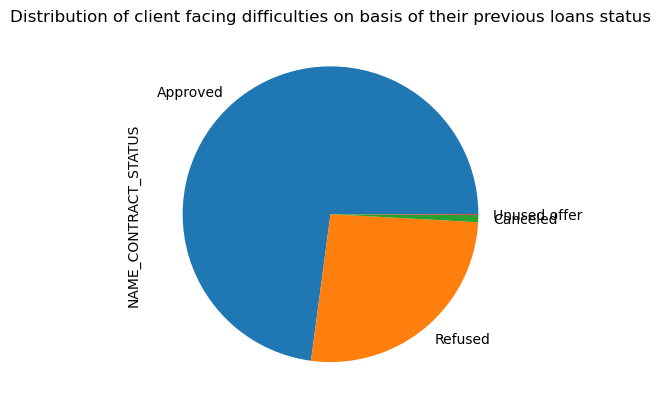

In [269]:
new_combined_diff.NAME_CONTRACT_STATUS.value_counts(normalize=True).plot.pie()
plt.title('Distribution of client facing difficulties on basis of their previous loans status')
plt.show()

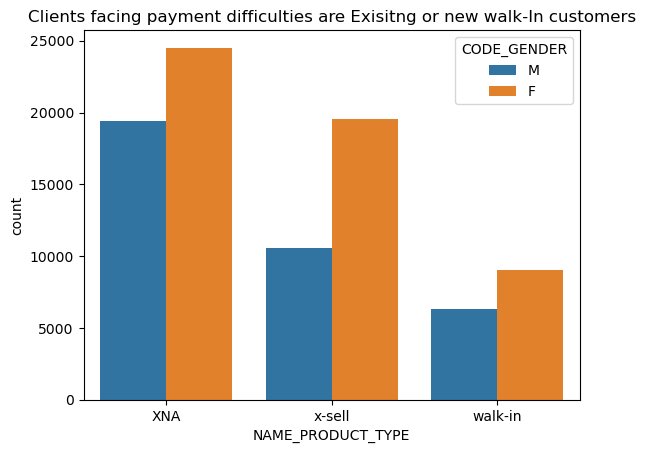

In [270]:
sns.countplot(data= new_combined_diff ,x ='NAME_PRODUCT_TYPE', hue='CODE_GENDER')
plt.title('Clients facing payment difficulties are Exisitng or new walk-In customers')
plt.show()

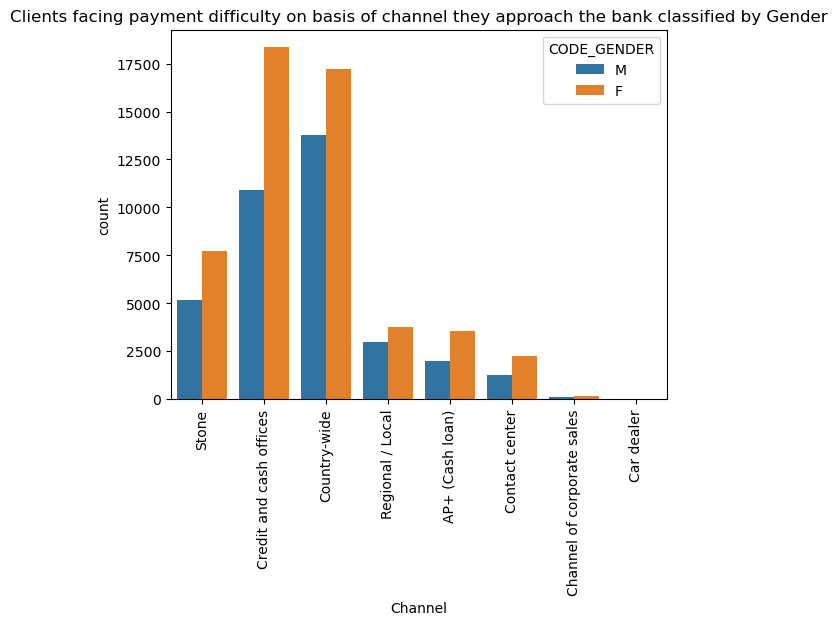

In [271]:
sns.countplot(data = new_combined_diff,x ='CHANNEL_TYPE', hue='CODE_GENDER')
plt.title('Clients facing payment difficulty on basis of channel they approach the bank classified by Gender')
plt.xlabel('Channel')
plt.xticks(rotation=90)
plt.show()

In [272]:
new_combined_diff.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest
82,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,Repeater,XNA,Cards,x-sell,Credit and cash offices,-1.0,XNA,0.0,XNA,Card X-Sell
132,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,Refreshed,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,24.0,high,Cash X-Sell: high
133,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1.0,XNA,36.0,low_normal,Cash Street: low


In [273]:
new_combined_diff.info(-1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90253 entries, 0 to 1078762
Data columns (total 95 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   SK_ID_CURR                    90253 non-null  int64   
 1   TARGET                        90253 non-null  int64   
 2   NAME_CONTRACT_TYPE_x          90253 non-null  object  
 3   CODE_GENDER                   90253 non-null  object  
 4   FLAG_OWN_CAR                  90253 non-null  object  
 5   FLAG_OWN_REALTY               90253 non-null  object  
 6   CNT_CHILDREN                  90253 non-null  int64   
 7   AMT_INCOME_TOTAL              90253 non-null  float64 
 8   AMT_CREDIT_x                  90253 non-null  float64 
 9   AMT_ANNUITY_x                 90253 non-null  float64 
 10  AMT_GOODS_PRICE_x             90253 non-null  float64 
 11  NAME_TYPE_SUITE               90253 non-null  object  
 12  NAME_INCOME_TYPE              90253 non-null

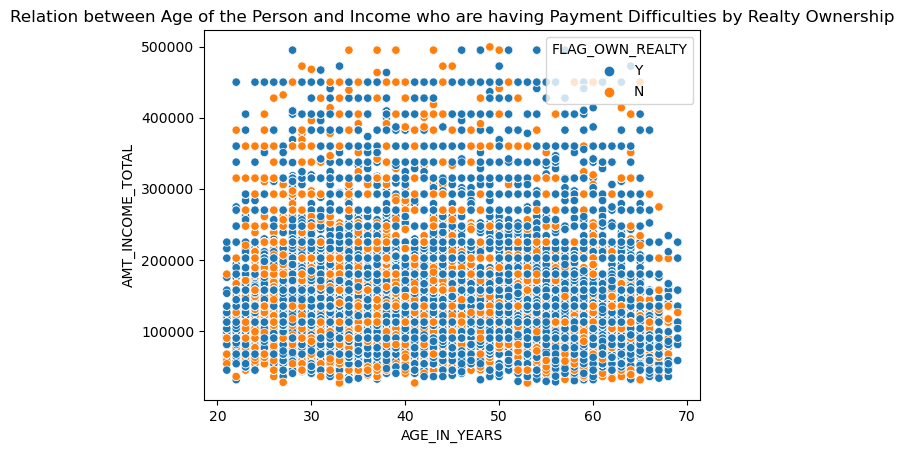

In [274]:
sns.scatterplot(x=new_combined_diff.AGE_IN_YEARS,y= new_combined_diff.AMT_INCOME_TOTAL, hue=new_combined.FLAG_OWN_REALTY)
plt.title('Relation between Age of the Person and Income who are having Payment Difficulties by Realty Ownership')
plt.show()

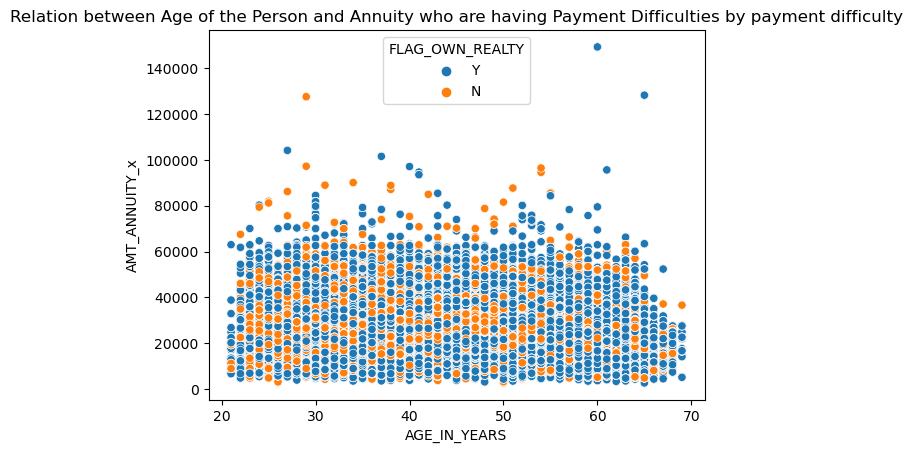

In [275]:
sns.scatterplot(x=new_combined_diff.AGE_IN_YEARS,y= new_combined_diff.AMT_ANNUITY_x, hue=new_combined.FLAG_OWN_REALTY)
plt.title('Relation between Age of the Person and Annuity who are having Payment Difficulties by payment difficulty')
plt.show()

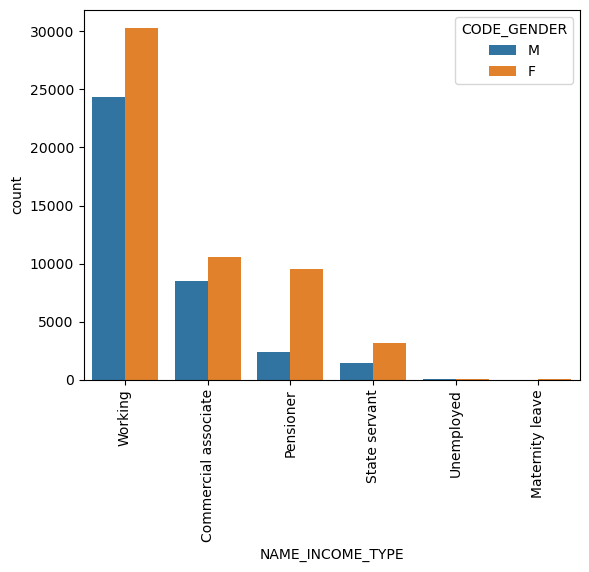

In [276]:
sns.countplot(data=new_combined_diff, x='NAME_INCOME_TYPE',hue='CODE_GENDER') 
plt.xticks(rotation = 90)
plt.show()

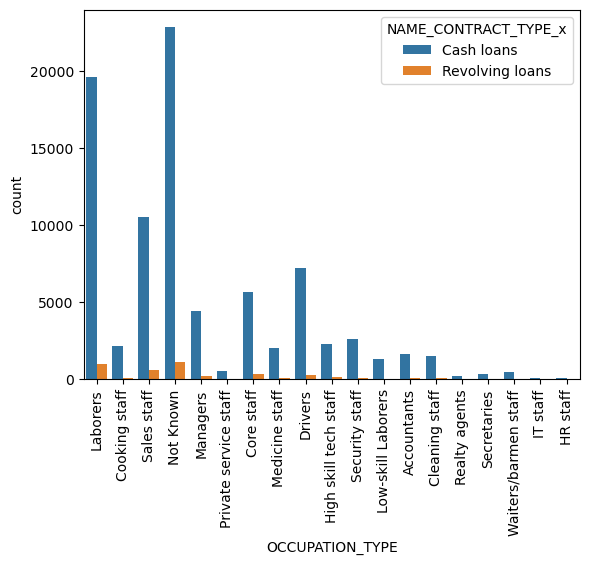

In [277]:
sns.countplot(data=new_combined_diff, x='OCCUPATION_TYPE',hue='NAME_CONTRACT_TYPE_x')
plt.xticks(rotation = 90)
plt.show()

In [281]:
pd.set_option('display.max_columns',200)

In [282]:
new_combined_diff.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TOTAL_ENQ_YEAR,AGE_IN_YEARS,AGE_GROUP,INCOME_GROUP,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,26,20-30,200000-300000,1038818.0,Consumer loans,9251.775,179055.0,179055.0,179055.000000,SATURDAY,9.0,Y,1.0,XAP,Approved,-606.0,Method Not Known,XAP,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest
82,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,2628,6573.0,1827,1,1,0,1,0,0,Cooking staff,1.0,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.548477,0.190706,10.0,1.0,10.0,0.0,161.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4.0,51,50-60,100000-200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,1262,1182.0,1029,1,1,0,1,0,0,Laborers,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.320163,0.0,0.0,0.0,0.0,1075.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.0,48,40-50,200000-300000,1472630.0,Revolving loans,22500.000,0.0,450000.0,221625.700511,SATURDAY,14.0,Y,1.0,XAP,Approved,-1172.0,Method Not Known,XAP,Repeater,XNA,Cards,x-sell,Credit and cash offices,-1.0,XNA,0.0,XNA,Card X-Sell
132,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,1262,1182.0,1029,1,1,0,1,0,0,Laborers,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.320163,0.0,0.0,0.0,0.0,1075.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.0,48,40-50,200000-300000,2426800.0,Cash loans,11117.700,157500.0,157500.0,157500.000000,FRIDAY,15.0,Y,1.0,XNA,Approved,-1467.0,Cash through the bank,XAP,Refreshed,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,24.0,high,Cash X-Sell: high
133,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Seco

In [284]:
new_combined_diff.NAME_PORTFOLIO.value_counts()

POS      43877
Cash     33377
Cards    12029
Cars        19
Name: NAME_PORTFOLIO, dtype: int64

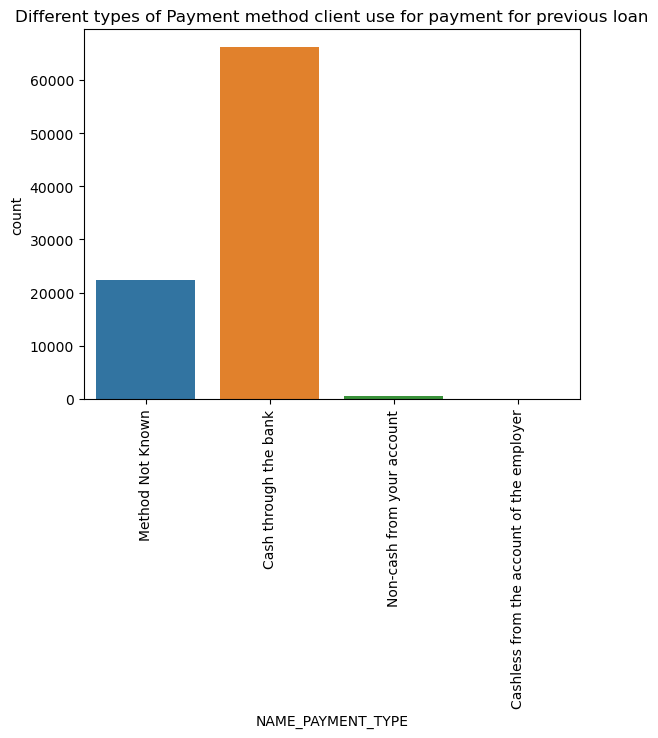

In [290]:
sns.countplot(new_combined_diff,x=new_combined_diff['NAME_PAYMENT_TYPE'])
plt.xticks(rotation=90)
plt.title('Different types of Payment method client use for payment for previous loan')
plt.show()